<a href="https://colab.research.google.com/github/Shibu4064/Thesis_Final/blob/main/EDA_fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import gdown
#https://docs.google.com/spreadsheets/d/11hYSUmDf84U4t3xlGGcOUohcJtjPcB1f/edit?usp=drive_link&ouid=112064606638502255676&rtpof=true&sd=true
train_data_link="https://drive.google.com/uc?id=11hYSUmDf84U4t3xlGGcOUohcJtjPcB1f"
gdown.download(train_data_link,"Panda.xlsx")

Downloading...
From: https://drive.google.com/uc?id=11hYSUmDf84U4t3xlGGcOUohcJtjPcB1f
To: /content/Panda.xlsx
100%|██████████| 2.29M/2.29M [00:00<00:00, 7.49MB/s]


'Panda.xlsx'

In [5]:
import pandas as pd
fake=pd.read_excel('Panda.xlsx')
fake.head()
fake.shape
fake

,Headline,Content
0,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"গুজবের উৎপত্তি মে ৩০, ২০১৮ তারিখে rpolitician...."
1,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই...
2,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,গুজবের উৎপত্তি আগস্টের ২০ তারিখে Songrami71 না...
3,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,গুজবের উৎপত্তি আগস্ট ২১ তারিখে একাধিক বেনামী ন...
4,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,গুজবের উৎপত্তি আগস্ট ১২ তারিখে একাধিক ফেসবুক প...
...,...,...
1721,মেঘভাঙা বৃষ্টিতে ধরমশালায় ভূমিধ্বসের ভিডিও ভাই...,হিমাচল প্রদেশের ধরমশালায় মেঘ ভাঙা বৃষ্টির কারণ...
1722,৫ সেপ্টেম্বরেই হচ্ছে NEET 2021-র পরীক্ষা?উদ্বে...,নিট নিয়ে চিন্তার আর শেষ নেই। করোনাকালে ক্রমেই ...
1723,"১৫ জুলাই দেশে আছড়ে পড়তে পারে তৃতীয় ওয়েভ, কী বল...",করোনার দ্বিতীয় ওয়েভের জের এখনও কাটেনি আর তার ম...
1724,"একসঙ্গে দশ শিশুর জন্মের খবর ভুয়ো, গ্রেফতার দক্...",সম্প্রতি দক্ষিণ আফ্রিকার এক মহিলা একসঙ্গে ১০ জ...


In [6]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

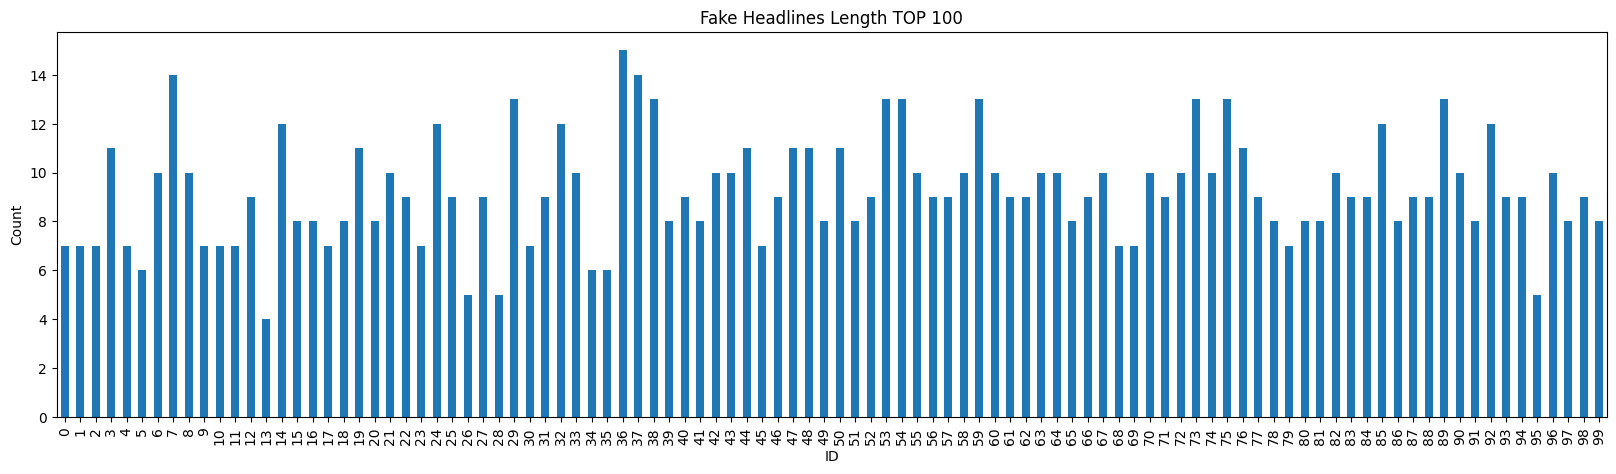

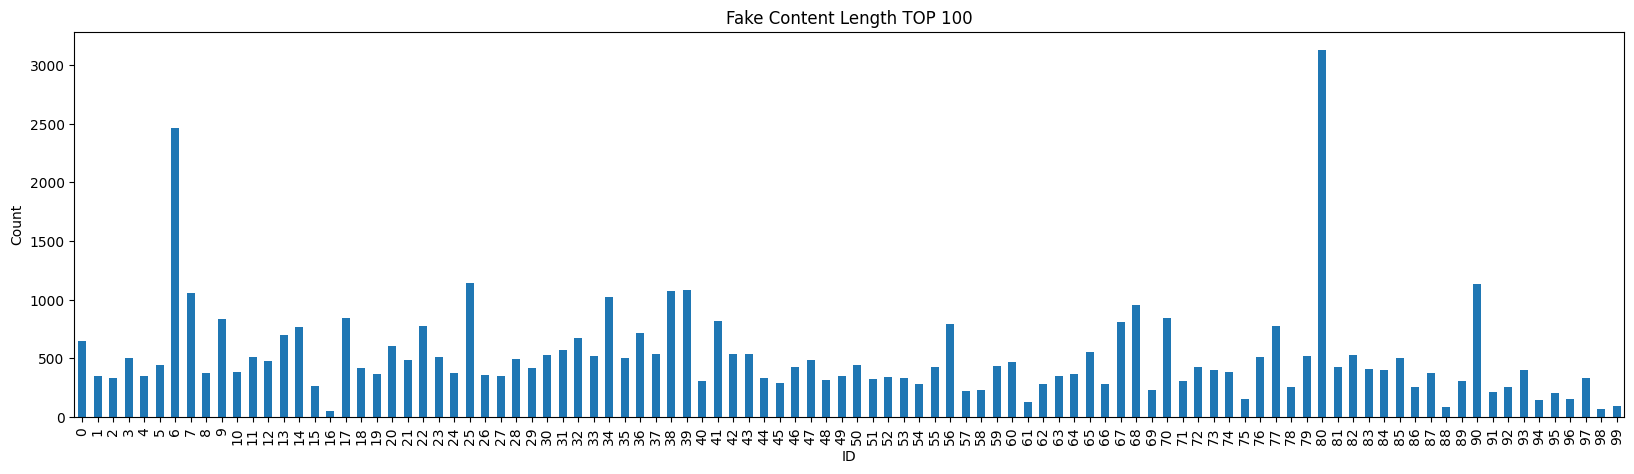

In [7]:
fake['head_lenght'] = fake.Headline.apply(lambda x : len(x.split()))
fake['content_head_lenght'] = fake.Content.apply(lambda x : len(x.split()))

show_bar(fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(fake.content_head_lenght, "Fake Content Length TOP 100")

<ipython-input-6-0115600331fe>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


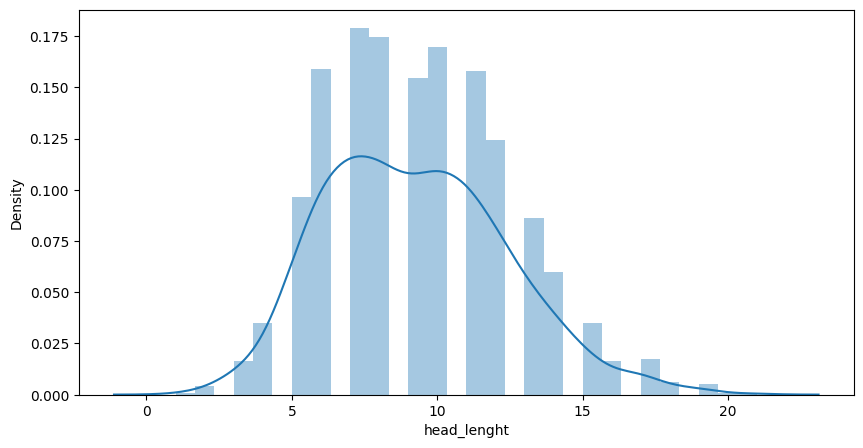

<ipython-input-6-0115600331fe>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


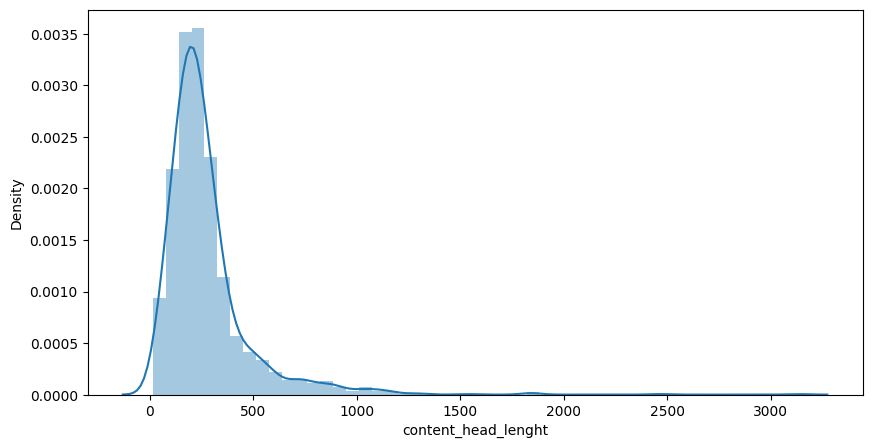

In [8]:
show_dist(fake.head_lenght)
print("")
show_dist(fake.content_head_lenght)

In [9]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-10-10 12:51:18--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 172.67.165.83, 104.21.11.66, 2606:4700:3035::ac43:a553, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|172.67.165.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  1.54MB/s    in 0.2s    

2023-10-10 12:51:19 (1.54 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [10]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [11]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500,
                    background_color ='black',
                    font_path="/content/Nikosh.ttf",
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

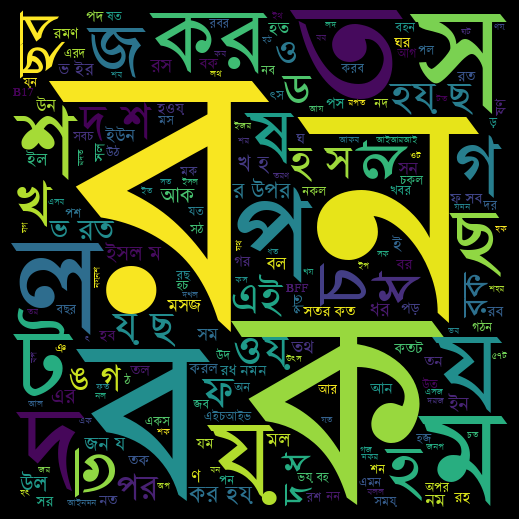

In [12]:
s= " ".join(fake.Headline[:100])
plot_world(s)

In [13]:
!pip install bnlp

  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32803 sha256=ba6af9d059ebe85296bc13779c18d111e520d835221ec5661869691bd2d20b07
  Stored in directory: /root/.cache/pip/wheels/64/c7/7e/272284eb8c800fbb5306bdf7904ae9f99a64812fc615f471b2
Successfully built bnlp


In [14]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=a073167d08ec432ad8f5bd8a7f950afa7c9ed5f8c23f2637efe0bff20f083327
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')

print(stop_words_bengali)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
from collections import defaultdict
from collections import  Counter
# from bnlp.corpus import stopwords
from nltk.corpus import stopwords
stop_words_bengali = stopwords.words('bengali')
import matplotlib.font_manager as fm


def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stop_words_bengali:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

In [17]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 46.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=56defa82357ae264f484693465abe94aeb0f0ae16cd1bb16e8bb5efb7f1a05bd
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [18]:
from bnlp import corpus

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


In [20]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus


In [21]:
fake_corpus = create_corpus(fake.Headline[:1000])
print("Total fake tokens in 1000 is : ", len(fake_corpus))

Total fake tokens in 1000 is :  12185


('কি', 'না', 'করে', 'থেকে', 'নিয়ে', 'এই', 'ও', 'এর', 'কী', 'নয়', 'হবে', 'লক্ষ', 'র', 'হল', 'করা', 'এ', 'ধরা', 'জন্য', 'এবার', 'পর')
(101, 71, 63, 62, 62, 35, 32, 28, 28, 27, 26, 25, 24, 23, 22, 21, 21, 20, 20, 18)


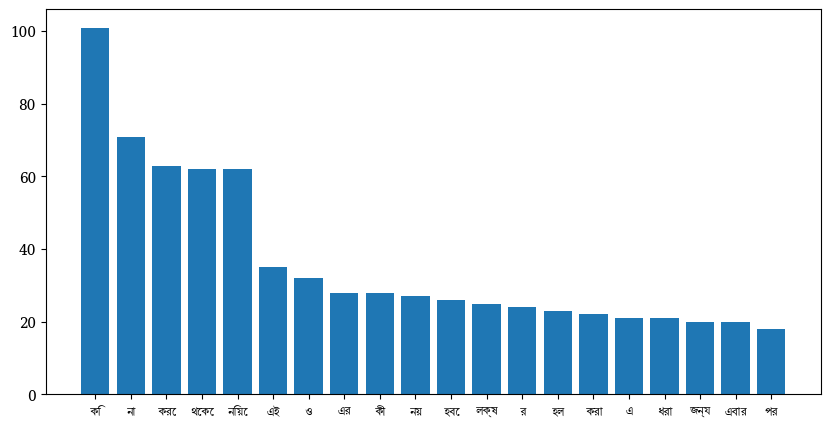

In [22]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("/content/Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False
show_stop_words(fake_corpus)

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt')

def filters(corpus):
    stop_words = set(stopwords.words('english'))
    res = []
    for i in corpus:
        if i in stop_words:
            continue

        if i in punctuation + '‘' + '’':
            continue

        if i.isdigit():
            continue

        res.append(i)

    return res

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
fake_corpus_filtered = filters(fake_corpus)

In [26]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [27]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 100 words")
print(x[:100])
print(y[:100])

Top 100 words
('ভুয়ো', 'খবর', 'কি', 'Fake', 'গ্রেফতার', 'না', 'টাকা', 'ভুয়ো', 'করে', 'থেকে', 'নিয়ে', 'জাল', 'প্রতারণা', 'করোনা', 'নামে', 'ধৃত', 'ভুয়া', 'এই', 'তথ্য', 'টিকা', 'পুলিশ', 'ও', 'প্রচার', 'গুজব', 'ছবি', 'অভিযোগ', 'ভাইরাল', 'এর', 'দিয়ে', 'কী', 'নয়', 'ফেক', 'হবে', 'দাবি', 'বিরুদ্ধে', 'কেন্দ্র', 'করল', 'লক্ষ', '\u200c', 'র', 'হল', 'করা', 'পুলিশের', 'নোট', 'বিভ্রান্তিকর', 'ফেসবুক', 'নাম', 'এ', 'খবরের', 'চাকরি', 'যুবক', 'ধরা', 'ভ্যাকসিন', 'জন্য', 'এবার', 'হয়েছে', 'নকল', 'আসল', 'পর', 'সোশ্যাল', 'ভারতে', 'নতুন', 'বলে', 'সরকার', 'টাকার', 'CBI', 'দিচ্ছে', 'আরও', 'সঙ্গে', 'কার্ড', 'দেবাঞ্জন', 'করোনাভাইরাস', 'হয়ে', 'ভিডিও', 'ভুল', 'কোটি', 'পদক্ষেপ', 'রুখতে', 'দিতে', 'কল', 'উদ্ধার', 'হচ্ছে', 'মিডিয়ায়', 'News', 'WhatsApp', 'করতে', 'কলকাতা', 'দেবাঞ্জনের', 'পারে', 'মেসেজ', 'নিন', 'হাজার', 'দিয়ে', 'ফাঁস', 'মুখ', 'কাণ্ডে', 'বাংলাদেশের', 'আক্রান্ত', 'খবরটি', 'হওয়ার')
(252, 108, 101, 89, 73, 71, 68, 67, 63, 62, 62, 47, 44, 42, 41, 41, 40, 35, 34, 34, 32, 32, 32, 31, 30, 30, 29, 28, 28, 28, 27

In [28]:
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm

In [29]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=100):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['head']+"[SEP]"+value['con'] , value['label']

In [31]:
fake=pd.read_excel("/content/Panda.xlsx")
fake

,Headline,Content
0,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"গুজবের উৎপত্তি মে ৩০, ২০১৮ তারিখে rpolitician...."
1,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই...
2,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,গুজবের উৎপত্তি আগস্টের ২০ তারিখে Songrami71 না...
3,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,গুজবের উৎপত্তি আগস্ট ২১ তারিখে একাধিক বেনামী ন...
4,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,গুজবের উৎপত্তি আগস্ট ১২ তারিখে একাধিক ফেসবুক প...
...,...,...
1721,মেঘভাঙা বৃষ্টিতে ধরমশালায় ভূমিধ্বসের ভিডিও ভাই...,হিমাচল প্রদেশের ধরমশালায় মেঘ ভাঙা বৃষ্টির কারণ...
1722,৫ সেপ্টেম্বরেই হচ্ছে NEET 2021-র পরীক্ষা?উদ্বে...,নিট নিয়ে চিন্তার আর শেষ নেই। করোনাকালে ক্রমেই ...
1723,"১৫ জুলাই দেশে আছড়ে পড়তে পারে তৃতীয় ওয়েভ, কী বল...",করোনার দ্বিতীয় ওয়েভের জের এখনও কাটেনি আর তার ম...
1724,"একসঙ্গে দশ শিশুর জন্মের খবর ভুয়ো, গ্রেফতার দক্...",সম্প্রতি দক্ষিণ আফ্রিকার এক মহিলা একসঙ্গে ১০ জ...


In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = []
    for i in tokens:
        if i in stop_words:
            continue

        if i in punctuation + '‘' + '’':
            continue

        filtered.append(i)

    return " ".join(filtered)

print("********** Before ***************")
text = fake.iloc[1]['Content']
print(text)
print("\n********** After ***************")
print(clean_text(text))

********** Before ***************
গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই শিরোনামে সংবাদ প্রকাশিত হয়ে আসছে বিভিন্ন বেনামী নিউজপোর্টালে। সংবাদে চাঁপাইনবাবগঞ্জ জেলায় তাসফিয়া নামক সাড়ে তিন বছর বয়সী শিশুর গায়ে ‘পশুর’ লোম উঠছে এমন একটি খবর প্রকাশ করা হয়। DailyNews96.com নামক একটি বেনামী নিউজপোর্টাল সংবাদটি প্রকাশ করে। পরবর্তীতে তা নামিয়ে ফেলে নিউজপোর্টালটি। সত্যতা যাচাই প্রায় এক বছর ধরে হুবহু কপি-পেস্ট করে একাধিক তথাকথিত নিউজপোর্টাল সংবাদটি প্রকাশ করে আসছে। যেখানে একবছরের অধিক সময় পার হয় গেলেও শিশুর বয়সের উল্লেখ রয়েছে “সাড়ে তিন বছর” এবং সাম্প্রতিক কোনো তথ্য প্রদান করা হয়নি সংবাদগুলোতে। এই বিষয়ের ২ বছর পূর্বের একটি সংবাদের অস্তিত্ব পাওয়া যায়। দৈনিক ইত্তেফাকের ২৫ আগস্ট ২০১৯ তারিখের সংবাদে উল্লেখ— “চাঁপাইনবাবগঞ্জে বিরল রোগে আক্রান্ত দরিদ্র পরিবারে সাড়ে তিন বছরের শিশু কন্যা তাসফিয়া জাহান মুনিরা। তার বাবা দিনমজুর মাসুদুজ্জামান মামুন। বাড়ি নাচোল বনবিভাগের পাশে গোডাউন পাড়া।শিশু তাসফিয়া জন্মের পর থেকেই তার শরীরের লম্বা লম্বা পশম দেখা যায়। দিন যতই গড়াচ্ছে পশমগুলিও বাড়তে ব

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
fake['head'] = fake.Headline.apply(clean_text)
fake['con'] = fake.Content.apply(clean_text)

In [34]:
fake

,Headline,Content,head,con
0,শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,"গুজবের উৎপত্তি মে ৩০, ২০১৮ তারিখে rpolitician....",শেখ হাসিনা বিশ্বের সবচেয়ে নিকৃষ্ট প্রধানমন্ত্...,গুজবের উৎপত্তি মে ৩০ ২০১৮ তারিখে rpolitician.c...
1,শিশুর শরীরে হঠাৎ করে গজাচ্ছে ‘পশুর’ লোম?,গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই...,শিশুর শরীরে হঠাৎ করে গজাচ্ছে পশুর লোম,গুজবের উৎপত্তি বিগত কয়েক মাস ধরে সময়সময়ে এই...
2,বিসিবি না চাইলেও ‘বিদায়’ জানিয়ে দিলেন সাকিব?,গুজবের উৎপত্তি আগস্টের ২০ তারিখে Songrami71 না...,বিসিবি না চাইলেও বিদায় জানিয়ে দিলেন সাকিব,গুজবের উৎপত্তি আগস্টের ২০ তারিখে Songrami71 না...
3,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,গুজবের উৎপত্তি আগস্ট ২১ তারিখে একাধিক বেনামী ন...,সিলেটে পুলিশ কর্মকর্তার বাড়ি থেকে পুঁতে রাখা ১...,গুজবের উৎপত্তি আগস্ট ২১ তারিখে একাধিক বেনামী ন...
4,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,গুজবের উৎপত্তি আগস্ট ১২ তারিখে একাধিক ফেসবুক প...,ক্লাব পরিবর্তন করে পিএসজিতে যাচ্ছেন ক্রিস্টিয়া...,গুজবের উৎপত্তি আগস্ট ১২ তারিখে একাধিক ফেসবুক প...
...,...,...,...,...
1721,মেঘভাঙা বৃষ্টিতে ধরমশালায় ভূমিধ্বসের ভিডিও ভাই...,হিমাচল প্রদেশের ধরমশালায় মেঘ ভাঙা বৃষ্টির কারণ...,মেঘভাঙা বৃষ্টিতে ধরমশালায় ভূমিধ্বসের ভিডিও ভাই...,হিমাচল প্রদেশের ধরমশালায় মেঘ ভাঙা বৃষ্টির কারণ...
1722,৫ সেপ্টেম্বরেই হচ্ছে NEET 2021-র পরীক্ষা?উদ্বে...,নিট নিয়ে চিন্তার আর শেষ নেই। করোনাকালে ক্রমেই ...,৫ সেপ্টেম্বরেই হচ্ছে NEET 2021-র পরীক্ষা উদ্বে...,নিট নিয়ে চিন্তার আর শেষ নেই। করোনাকালে ক্রমেই ...
1723,"১৫ জুলাই দেশে আছড়ে পড়তে পারে তৃতীয় ওয়েভ, কী বল...",করোনার দ্বিতীয় ওয়েভের জের এখনও কাটেনি আর তার ম...,১৫ জুলাই দেশে আছড়ে পড়তে পারে তৃতীয় ওয়েভ কী বলছ...,করোনার দ্বিতীয় ওয়েভের জের এখনও কাটেনি আর তার ম...
1724,"একসঙ্গে দশ শিশুর জন্মের খবর ভুয়ো, গ্রেফতার দক্...",সম্প্রতি দক্ষিণ আফ্রিকার এক মহিলা একসঙ্গে ১০ জ...,একসঙ্গে দশ শিশুর জন্মের খবর ভুয়ো গ্রেফতার দক্ষ...,সম্প্রতি দক্ষিণ আফ্রিকার এক মহিলা একসঙ্গে ১০ জ...
